<a href="https://colab.research.google.com/github/fx-manmeet/learn-ml-repo/blob/main/Can_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-ocr numpy matplotlib opencv-python

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [ ]:
!python --version

Python 3.10.12


In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import numpy as np
from PIL import Image

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
#pipeline preprocess for ocr

# Function to display and save images
def display_and_save_image(image, title, filename):
    print(image.shape)
    cv2.imwrite(filename, image)
    # plt.figure(figsize=(6, 6))
    # plt.imshow(image, cmap='gray')
    # #plt.title(title)
    # plt.axis('off')
    # #plt.savefig(filename)
    # #plt.show()

# Blurring function
def apply_blur(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    display_and_save_image(blurred, 'Blurred Image', 'blurred_image.png')
    return blurred

# Thresholding function
def apply_threshold(image):
    thresholded = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)
    display_and_save_image(thresholded, 'Thresholded Image', 'thresholded_image.png')
    return thresholded


# Morphological operations function
def apply_morphological_operations(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    display_and_save_image(closing, 'Morphological Operations Applied Image', 'morphed_image.png')
    return closing

# Noise removal function
def remove_noise(image):
    noise_removed = cv2.medianBlur(image, 5)
    display_and_save_image(noise_removed, 'Noise Removed Image', 'noise_removed_image.png')
    return noise_removed

# Complete preprocessing pipeline
def preprocess_image_for_ocr(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    display_and_save_image(image, 'Original Image', 'original_image.png')

    # Apply blurring
    blurred_image = apply_blur(image)

    # Apply thresholding
    thresholded_image = apply_threshold(blurred_image)

    # Apply morphological operations (opening and closing)
    morphed_image = apply_morphological_operations(thresholded_image)

    # Remove noise
    final_image = remove_noise(morphed_image)

    display_and_save_image(final_image, 'Final Preprocessed Image', 'final_image.png')
    return final_image




(2832, 2124)
(2832, 2124)
(2832, 2124)
(2832, 2124)
(2832, 2124)
(2832, 2124)
1/1 [==============================] - 4s 4s/step


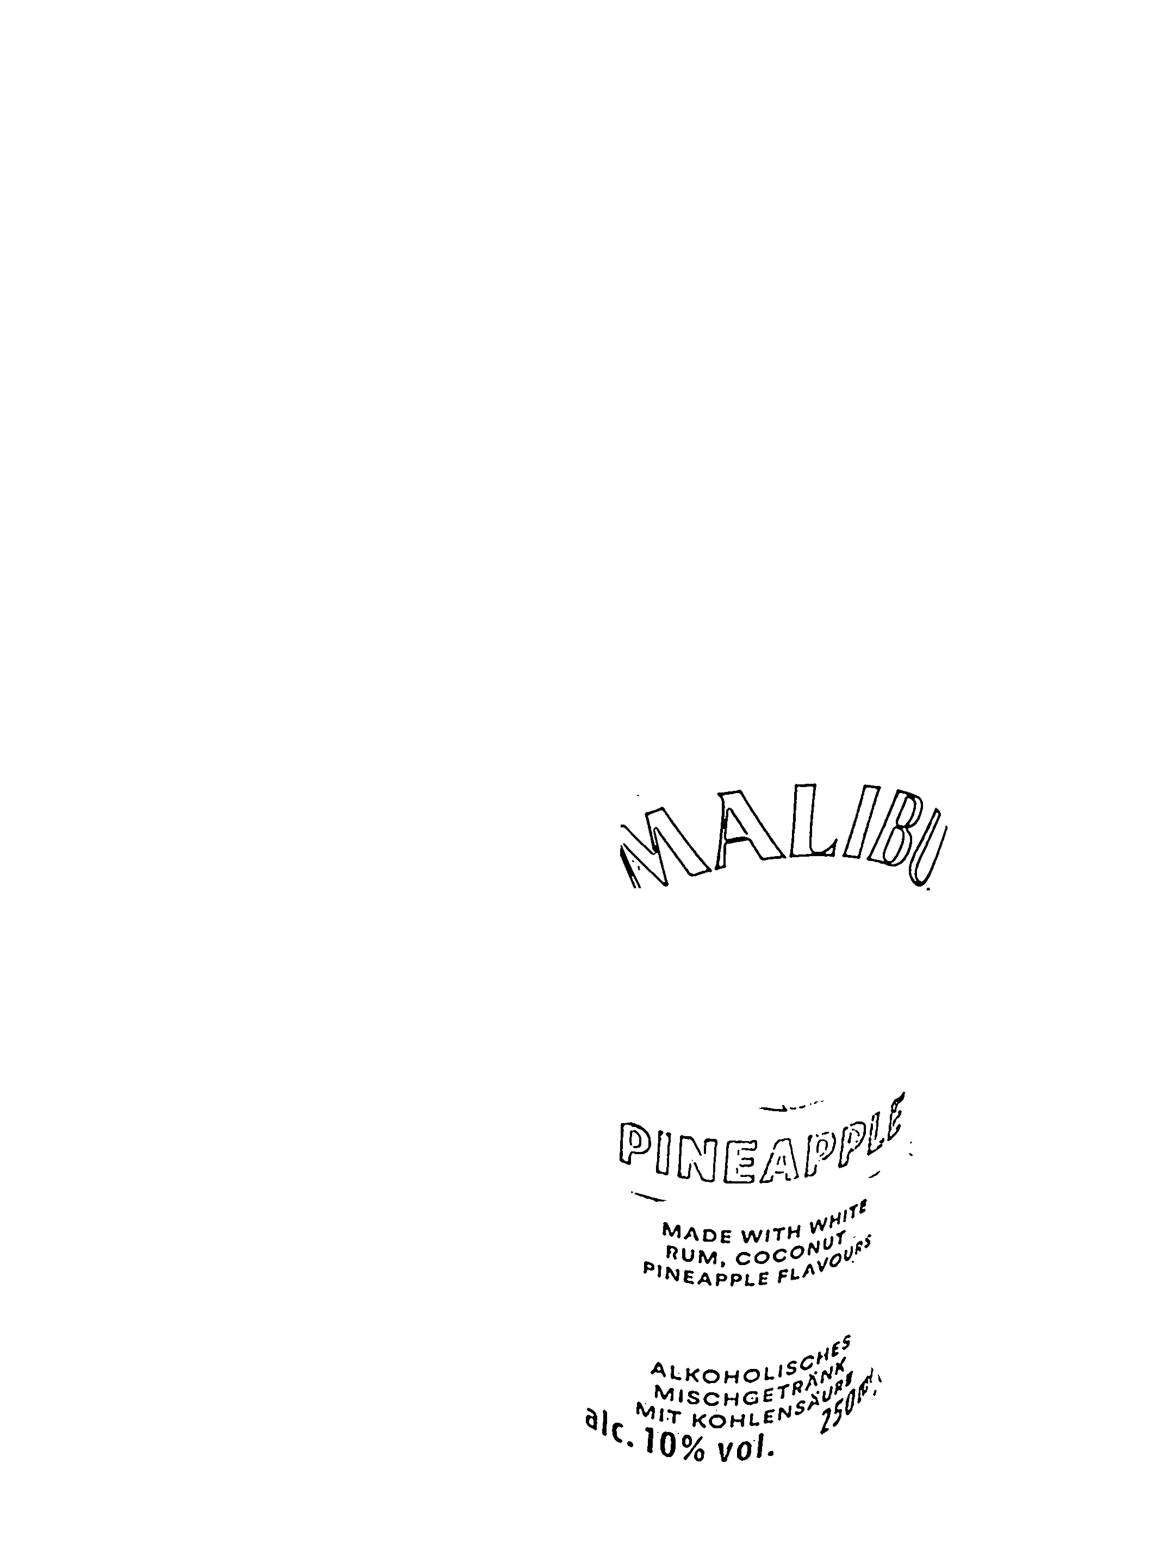

In [ ]:
# Example usage:
preprocessed_image = preprocess_image_for_ocr('/content/drive/MyDrive/OCR_Cardbord_images/1708520937805636.jpg')
image_path = 'final_image.png'
image = keras_ocr.tools.read(image_path)

predictions = pipeline.recognize([image])  #4 GB RAM, 1m to complete(on cpu)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

# Ensure axs is always a list for consistent iteration
axs = [ax]

# Iterate over the predictions
for ax, image, prediction in zip(axs, [image], predictions):
    masked_image = np.ones_like(image) * 255  # Start with a white image
    for word, box in prediction:
        # Create a mask for the bounding box
        mask = np.zeros_like(image, dtype=np.uint8)
        polygon = np.array([box], dtype=np.int32)
        cv2.fillPoly(mask, polygon, (255, 255, 255))

        # Apply the mask to the image (keeping only the region inside the polygon)
        masked_image = np.where(mask == 255, image, masked_image)

    # Convert the masked image to a PIL Image and save it
    imagez = Image.fromarray(masked_image)
    imagez.save('saved_image.png')

    # Display the masked image
    ax.imshow(masked_image)
    ax.axis('off')  # Hide the axis

plt.show()